In [191]:
import json
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
# Only able to save 177 of 43,791 rows. To save all rows, use the export to BigQuery table action instead.

# Step 1: Parse the JSON data and extract the required information into a list of dictionaries
with open('/content/baselineExpressions.json', 'r') as f:
    data = json.load(f)

In [145]:
# Iterate over each dictionary in the list and extract the ID and the list of organs and their RNA values.
result = []
for element in data:
    id = element['id']
    organs = {}
    for tissue in element['tissues']['list']:
        organ_list = tissue['element']['organs']['list']
        rna_value = float(tissue['element']['rna']['value'])
        for organ in organ_list:
            organ_name = organ['element']
            if organ_name not in organs or rna_value > organs[organ_name]['rna_value']:
                organs[organ_name] = {
                    'rna_value': rna_value,
                    'rank': 0,
                }
    # For each organ in the list, assign a rank based on its RNA value, with 1 being the lowest rank.
    for rank, organ in enumerate(sorted(organs, key=lambda k: organs[k]['rna_value'])):
        organs[organ]['rank'] = rank + 1
    
    # Store the results in a new list of dictionaries.
    for organ, values in organs.items():
        result.append({
            'ID': id,
            'Organ': organ,
            'rna_value': values['rna_value'],
            'rank': values['rank'],
        })

In [146]:
result

[{'ID': 'ENSG00000253148',
  'Organ': 'tracheobronchial tree',
  'rna_value': 0.0,
  'rank': 1},
 {'ID': 'ENSG00000253148', 'Organ': 'lung', 'rna_value': 0.0, 'rank': 2},
 {'ID': 'ENSG00000253148', 'Organ': 'heart', 'rna_value': 0.0, 'rank': 3},
 {'ID': 'ENSG00000253148', 'Organ': 'brain', 'rna_value': 0.0, 'rank': 4},
 {'ID': 'ENSG00000253148',
  'Organ': 'connective tissue',
  'rna_value': 0.0,
  'rank': 5},
 {'ID': 'ENSG00000253148', 'Organ': 'breast', 'rna_value': 0.0, 'rank': 6},
 {'ID': 'ENSG00000253148', 'Organ': 'kidney', 'rna_value': 0.0, 'rank': 7},
 {'ID': 'ENSG00000253148',
  'Organ': 'endocrine gland',
  'rna_value': 0.0,
  'rank': 8},
 {'ID': 'ENSG00000253148', 'Organ': 'intestine', 'rna_value': 0.0, 'rank': 9},
 {'ID': 'ENSG00000253148', 'Organ': 'rectum', 'rna_value': 0.0, 'rank': 10},
 {'ID': 'ENSG00000253148',
  'Organ': 'reproductive structure',
  'rna_value': 0.0,
  'rank': 11},
 {'ID': 'ENSG00000253148',
  'Organ': 'reproductive organ',
  'rna_value': 0.0,
  'rank'

In [147]:
# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(result, columns=['ID', 'Organ', 'rna_value', 'rank'])

In [148]:
df

,ID,Organ,rna_value,rank
0,ENSG00000253148,tracheobronchial tree,0.0,1
1,ENSG00000253148,lung,0.0,2
2,ENSG00000253148,heart,0.0,3
3,ENSG00000253148,brain,0.0,4
4,ENSG00000253148,connective tissue,0.0,5
...,...,...,...,...
5649,ENSG00000275585,pharynx,2.0,10
5650,ENSG00000275585,peritoneum,2.0,11
5651,ENSG00000275585,esophagogastric junction,2.0,12
5652,ENSG00000275585,stomach,2.0,13


In [149]:
# get all unique IDs
ids = df['ID'].unique()

In [150]:
ids


array(['ENSG00000253148', 'ENSG00000284931', 'ENSG00000251411',
       'ENSG00000226791', 'ENSG00000235698', 'ENSG00000170631',
       'ENSG00000251474', 'ENSG00000207773', 'ENSG00000245598',
       'ENSG00000279137', 'ENSG00000249509', 'ENSG00000230295',
       'ENSG00000250771', 'ENSG00000232656', 'ENSG00000231768',
       'ENSG00000258647', 'ENSG00000109762', 'ENSG00000241439',
       'ENSG00000271236', 'ENSG00000254707', 'ENSG00000121933',
       'ENSG00000253915', 'ENSG00000117707', 'ENSG00000229502',
       'ENSG00000163394', 'ENSG00000261821', 'ENSG00000137210',
       'ENSG00000279730', 'ENSG00000266651', 'ENSG00000230303',
       'ENSG00000153885', 'ENSG00000137757', 'ENSG00000276668',
       'ENSG00000149656', 'ENSG00000258457', 'ENSG00000263563',
       'ENSG00000266017', 'ENSG00000234692', 'ENSG00000215630',
       'ENSG00000261513', 'ENSG00000229979', 'ENSG00000270157',
       'ENSG00000278514', 'ENSG00000256995', 'ENSG00000264067',
       'ENSG00000129451', 'ENSG000002278

In [151]:
# get all possible pairs of IDs
id_pairs = list(combinations(ids, 2))


In [152]:
id_pairs

[('ENSG00000253148', 'ENSG00000284931'),
 ('ENSG00000253148', 'ENSG00000251411'),
 ('ENSG00000253148', 'ENSG00000226791'),
 ('ENSG00000253148', 'ENSG00000235698'),
 ('ENSG00000253148', 'ENSG00000170631'),
 ('ENSG00000253148', 'ENSG00000251474'),
 ('ENSG00000253148', 'ENSG00000207773'),
 ('ENSG00000253148', 'ENSG00000245598'),
 ('ENSG00000253148', 'ENSG00000279137'),
 ('ENSG00000253148', 'ENSG00000249509'),
 ('ENSG00000253148', 'ENSG00000230295'),
 ('ENSG00000253148', 'ENSG00000250771'),
 ('ENSG00000253148', 'ENSG00000232656'),
 ('ENSG00000253148', 'ENSG00000231768'),
 ('ENSG00000253148', 'ENSG00000258647'),
 ('ENSG00000253148', 'ENSG00000109762'),
 ('ENSG00000253148', 'ENSG00000241439'),
 ('ENSG00000253148', 'ENSG00000271236'),
 ('ENSG00000253148', 'ENSG00000254707'),
 ('ENSG00000253148', 'ENSG00000121933'),
 ('ENSG00000253148', 'ENSG00000253915'),
 ('ENSG00000253148', 'ENSG00000117707'),
 ('ENSG00000253148', 'ENSG00000229502'),
 ('ENSG00000253148', 'ENSG00000163394'),
 ('ENSG000002531

In [186]:
# define a function to calculate the Spearman rank correlation
def calc_spearman_rank(id1, id2):
    ranks_1 = df.loc[df['ID'] == id1, 'rank'].values
    ranks_2 = df.loc[df['ID'] == id2, 'rank'].values

    # Find the difference in numpy array shape
    size_diff = len(ranks_2) - len(ranks_1)

    # Add zeros at the end of the shorter array
    if size_diff > 0:
        ranks_1 = np.concatenate([ranks_1, np.zeros(size_diff)])
    elif size_diff < 0:
        ranks_2 = np.concatenate([ranks_2, np.zeros(-size_diff)])

    spearman_corr, p_value = spearmanr(ranks_1, ranks_2)
    return spearman_corr

In [187]:
# from numpy.core.arrayprint import printoptions
# calculate the Spearman rank correlation for each pair
results = []
for pair in id_pairs:
    id1, id2 = pair
    spearman_corr = calc_spearman_rank(id1, id2)
    results.append({'ID1': id1, 'ID2': id2, 'Spearman Rank Correlation': spearman_corr})

In [189]:
# create a new dataframe to show the results
df_results = pd.DataFrame(results)

In [190]:
df_results

,ID1,ID2,Spearman Rank Correlation
0,ENSG00000253148,ENSG00000284931,1.000000
1,ENSG00000253148,ENSG00000251411,-0.144694
2,ENSG00000253148,ENSG00000226791,-0.088873
3,ENSG00000253148,ENSG00000235698,0.276534
4,ENSG00000253148,ENSG00000170631,0.106133
...,...,...,...
15571,ENSG00000260470,ENSG00000271524,-0.102639
15572,ENSG00000260470,ENSG00000275585,0.068548
15573,ENSG00000270491,ENSG00000271524,0.131232
15574,ENSG00000270491,ENSG00000275585,0.195381


In [194]:
# Calculate the frequency of each Spearman Rank Correlation value
corr_freq = df_results['Spearman Rank Correlation'].value_counts().sort_index()

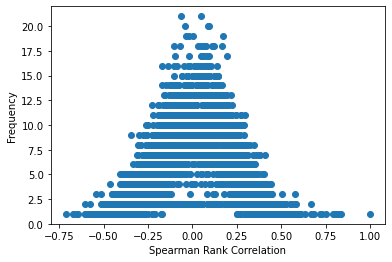

In [195]:
# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(corr_freq.index, corr_freq.values)
ax.set_xlabel('Spearman Rank Correlation')
ax.set_ylabel('Frequency')
plt.show()

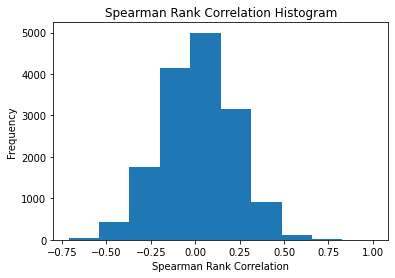

In [197]:
# Create the histogram
plt.hist(df_results['Spearman Rank Correlation'], bins=10)
plt.title('Spearman Rank Correlation Histogram')
plt.xlabel('Spearman Rank Correlation')
plt.ylabel('Frequency')
plt.show()